In [2]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def display_image(image):
    plt.imshow(image,cmap='gray')

In [23]:
#read image and convert color to RGB
img_original = cv2.imread('./bonn.png')
img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

In [24]:
#Ex1:
def integral_img_own(img):
    integral_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint32)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            tl = 0 if i == 0 or j == 0 else integral_img[i-1, j-1]
            t = 0 if i == 0 else integral_img[i-1, j]
            l = 0 if j == 0 else integral_img[i, j-1]   
            integral_img[i, j] = img[i, j] + t + l - tl
    return integral_img

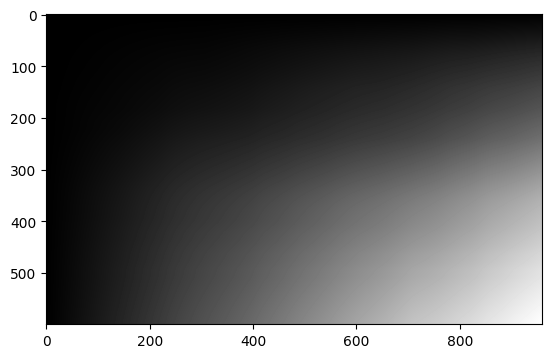

In [25]:
img_gray = cv2.cvtColor(img_original, cv2.COLOR_RGB2GRAY)
integral_img = integral_img_own(img_gray)
display_image(integral_img)

In [30]:
def mean_gray_sum(img,x=0,y=0,w=100,h=100):
    res = 0
    w = min(x+w,img.shape[0])
    h = min(y+h,img.shape[1])
    for i in range(x, w):
        for j in range(y, h):
            print(res)
            res += img[i, j]
    return res / (w-x) / (h-y)
def mean_gray_integral_CV(img,x=0,y=0,w=100,h=100, integral_img=None):
    if integral_img is None:
        integral_img  = cv2.integral(img)
    w = min(w, img.shape[0]-x)
    h = min(h, img.shape[1]-y)
    return (integral_img[x+w, y+h] - integral_img[x, y+h] - integral_img[x+w, y] + integral_img[x, y]) / w / h
def mean_gray_integral_own(img,x=0,y=0,w=100,h=100, integral_img=None):
    if integral_img is None:
        integral_img = integral_img_own(img)
    w = min(w, img.shape[0]-x)
    h = min(h, img.shape[1]-y)
    return (integral_img[x+w, y+h] - integral_img[x, y+h] - integral_img[x+w, y] + integral_img[x, y]) / w / h
print(mean_gray_sum(img_gray))
print(mean_gray_integral_CV(img_gray))
print(mean_gray_integral_own(img_gray))


0
39
78
112
146
182
218
253
32
69
106
142
178
215
252
34
72
110
148
186
224
7
46
82
118
177
236
19
58
100
142
186
230
15
56
111
166
213
4
49
94
131
168
242
60
139
218
29
96
186
20
79
138
199
4
92
180
243
50
129
208
6
60
119
178
0
78
138
198
24
106
173
240
42
100
163
226
45
120
210
44
106
168
232
40
103
166
241
60
124
188
6
80
151
222
37
108
185
6
75
144
183
222
0
34
70
106
141
176
213
250
30
66
103
140
178
216
254
36
74
112
151
190
226
6
65
124
163
202
244
30
74
118
159
200
255
54
101
148
193
238
19
56
130
204
27
106
173
240
74
164
223
26
87
148
236
68
131
194
17
96
150
204
7
66
144
222
26
86
168
250
61
128
186
244
51
114
189
8
98
188
250
56
120
184
247
54
129
204
12
76
150
224
39
110
181
252
73
150
219
32
83
134
167
200
232
8
41
74
108
142
177
212
248
28
64
100
137
174
212
250
33
72
117
162
202
242
28
70
111
152
195
238
23
64
104
144
187
230
18
62
106
150
192
234
21
64
110
156
204
252
44
92
143
194
248
46
104
162
223
28
84
140
198
0
57
114
173
232
45
114
181
248
74
156
219
26
99
172
2

C:\Users\dle\AppData\Local\Temp\ipykernel_18240\519479222.py:8: RuntimeWarning: overflow encountered in scalar add
  res += img[i, j]


77.23020000000001


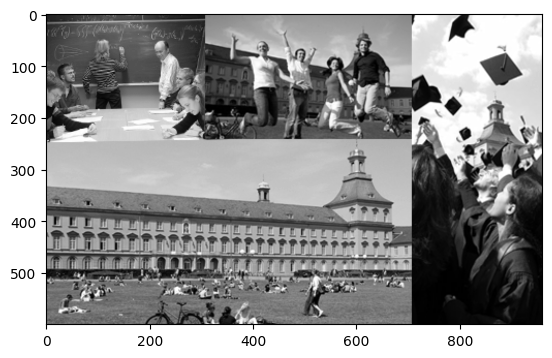

In [31]:
display_image(img_gray)